#Importing Libraries

In [ ]:
import os
from PIL import Image
import torch

import torchvision
import numpy as np
import shutil
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torchvision.utils import save_image

#Mount & Unzip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.makedirs("dataset/ROOTCANAL_MAIN_NOISE")

In [ ]:
cp "/content/drive/My Drive/Colab Notebooks/Datasets/ROOTCANAL_MAIN_NOISE.zip" dataset/ROOTCANAL_MAIN_NOISE.zip

In [ ]:
!unzip dataset/ROOTCANAL_MAIN_NOISE.zip -d dataset/ROOTCANAL_MAIN_NOISE

Archive:  dataset/ROOTCANAL_MAIN_NOISE.zip
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (240).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (221).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (225).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (215).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (238).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (239).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (209).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (226).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (231).jpg  
  inflating: dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11/ptf (213).jpg  
  inflating: dataset/ROOTCANAL_MAIN_N

In [ ]:

os.makedirs("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat")

In [ ]:
shutil.move("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Labels_malpractice/Labelled malpractice images ptf a11/classes.txt","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/")

'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/classes.txt'

In [ ]:
shutil.move("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat ptf a11","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat")

'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat/Plat ptf a11'

#Dataset Health Check

In [ ]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null
from pylabel import importer

In [ ]:
path_to_annotations = "data/coco128/labels/train2017/"

#Identify the path to get from the annotations to the images 
path_to_images = "../../images/train2017/"

#Import the dataset into the pylable schema 
#Class names are defined here https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml
yoloclasses = ['No Endodontic','Complete Endodontic','Incomplete Endodontic','Total Endodontic Failure']
dataset = importer.ImportYoloV5(path=path_to_annotations, path_to_images=path_to_images, cat_names=yoloclasses,
    img_ext="jpg", name="coco128")

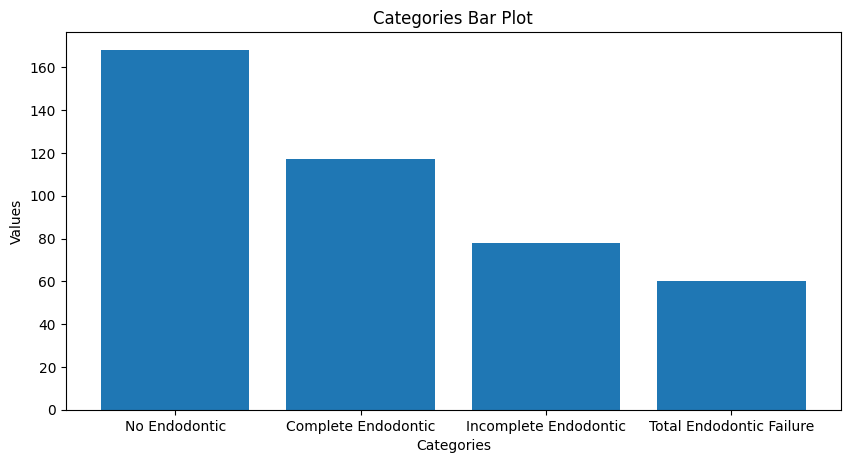

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
# Create Data
x=dataset.analyze.classes
y =dataset.analyze.class_counts

# Simple Bar Plot
plt.bar(x,y)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('Categories Bar Plot')
plt.show()

#DATA SPLITTING

In [ ]:
%pip install split-folders
import splitfolders
splitfolders.ratio('dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat', output="dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images", seed=1445, ratio=(.75,.05,.20))
splitfolders.ratio('dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Labels_malpractice/', output="dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels", seed=1445, ratio=(.75,.05,.20))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 240 files [00:00, 6560.69 files/s]
Copying files: 240 files [00:00, 8616.59 files/s]


In [ ]:
source1 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/Plat ptf a11/"
source2 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/test/Plat ptf a11/"
source3 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/val/Plat ptf a11/"
destination1 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/'
destination2 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/test/'
destination3 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/val/'
 
allfiles = os.listdir(source1) 
for f in allfiles:
    shutil.move(source1 + f, destination1 + f)

allfiles = os.listdir(source2) 
for f in allfiles:
    shutil.move(source2 + f, destination2 + f)

allfiles = os.listdir(source3) 
for f in allfiles:
    shutil.move(source3 + f, destination3 + f)



In [ ]:
#Deleting Empty Folders
shutil.rmtree(source1)
shutil.rmtree(source2)
shutil.rmtree(source3)

In [ ]:
source1 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/Labelled malpractice images ptf a11/"
source2 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/test/Labelled malpractice images ptf a11/"
source3 = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/val/Labelled malpractice images ptf a11/"
destination1 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/'
destination2 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/test/'
destination3 = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/val/'
 
allfiles = os.listdir(source1) 
for f in allfiles:
    shutil.move(source1 + f, destination1 + f)

allfiles = os.listdir(source2) 
for f in allfiles:
    shutil.move(source2 + f, destination2 + f)

allfiles = os.listdir(source3) 
for f in allfiles:
    shutil.move(source3 + f, destination3 + f)


In [ ]:
#Deleting Empty Folders
shutil.rmtree(source1)
shutil.rmtree(source2)
shutil.rmtree(source3)

In [ ]:
shutil.move("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/classes.txt","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Labels_malpractice/Labelled malpractice images ptf a11/")

'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Labels_malpractice/Labelled malpractice images ptf a11/classes.txt'

#AUGMENTATION

In [ ]:
os.makedirs("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Dataset_for_Augmentation") 

In [ ]:
source_img = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/"
source_label = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/"
destination = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Dataset_for_Augmentation/"


allfiles = os.listdir(source_img) 
for f in allfiles:
    shutil.copy(source_img + f, destination + f)

allfiles = os.listdir(source_label) 
for f in allfiles:
    shutil.copy(source_label + f, destination + f)

In [ ]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.5 MB/s 
     |████████████████████████████████| 276 kB 61.8 MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.47-py2.py3-none-any.whl size=74310 sha256=c0b5697c0796a9a427fd685a105d0ecccd717040e76c70d6b6f3e32dcbe89101
  Stored in directory: /root/.cache/pip/wheels/05/ff/0a/0e6e14c2a68d6869a010e979b8fd9d669aaeaa2d8b29de394f
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=0961b2dd7f23758ee18b8ca61659b757c6b9a2a9c668fe8995e1ca8fba05e7fa
  Stored in directory: /root/.cache/pip/wheels/eb/bb/07/25a7f0718ee3fe137384011b8e56070f91cf950ee6047c287f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62527 sha256=f86626d18984a2f0750cdd3c3fa79f934ff2d02f1cd503c843a10aa07177dfc9
  Stored in directory: /root/.cache/pip/wheels/92/e3/af/1dc0fdca93232d700ac176af6554cf22b85f3

In [ ]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

In [ ]:
INPUT_PATH = "dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Dataset_for_Augmentation"

In [ ]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

In [ ]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
   
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [ ]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])

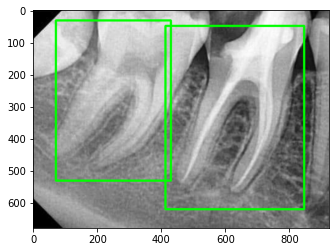

In [ ]:
#img,boxes = boxesFromYOLO("/content/dataset/ROOTCANAL/Radiographic Dataset/Plat ptf a11/ptf (1).jpg","/content/dataset/ROOTCANAL/Radiographic Dataset/Labels_malpractice/Labelled malpractice images ptf a11/ptf (1).txt")
img,boxes = boxesFromYOLO("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Dataset_for_Augmentation/ptf (10).jpg","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Dataset_for_Augmentation/ptf (10).txt")
showBoxes(img,boxes)

In [ ]:
transformer = transformerGenerator(PROBLEM)

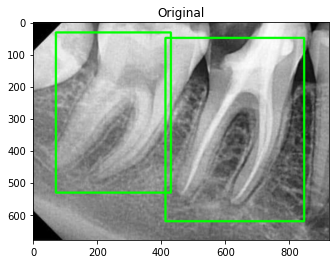

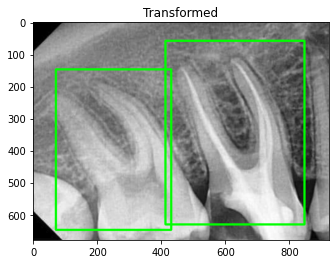

In [ ]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

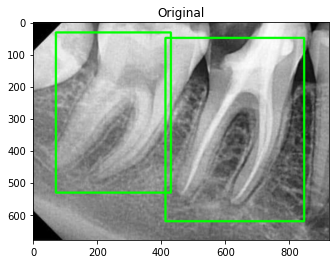

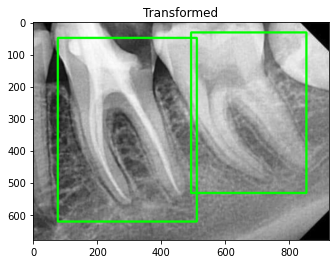

In [ ]:

hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

In [ ]:
#more augmentation
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

rotate = createTechnique("rotate", {"angle" : 70})
augmentor.addTransformer(transformer(rotate))

avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(avgBlur))

hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(hue))

none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [ ]:
train_dataset_path = 'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat/Plat ptf a11'

list = os.listdir(train_dataset_path) # dir is your directory path
number_files = len(list) 
number_files

240

In [ ]:
augmentor.applyAugmentation()

print("Number of images in the folder")
!ls -1 augmented_images_yolo/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolo/*.txt | wc -l

Number of images in the folder
1260
Number of annotations in the folder
1260


In [ ]:
!zip -r augmented_images_yolo.zip augmented_images_yolo
#from google.colab import files
#files.download('augmented_images_yolo.zip')

  adding: augmented_images_yolo/ (stored 0%)
  adding: augmented_images_yolo/20_1_ptf (222).txt (deflated 60%)
  adding: augmented_images_yolo/110_4_ptf (146).txt (deflated 26%)
  adding: augmented_images_yolo/174_5_ptf (12).jpg (deflated 4%)
  adding: augmented_images_yolo/92_1_ptf (213).jpg (deflated 4%)
  adding: augmented_images_yolo/121_0_ptf (232).txt (deflated 28%)
  adding: augmented_images_yolo/18_0_ptf (217).txt (deflated 27%)
  adding: augmented_images_yolo/2_4_ptf (142).txt (deflated 32%)
  adding: augmented_images_yolo/171_6_ptf (195).jpg (deflated 9%)
  adding: augmented_images_yolo/131_4_ptf (240).jpg (deflated 1%)
  adding: augmented_images_yolo/102_6_ptf (130).txt (deflated 28%)
  adding: augmented_images_yolo/28_6_ptf (52).txt (deflated 27%)
  adding: augmented_images_yolo/171_0_ptf (195).txt (deflated 51%)
  adding: augmented_images_yolo/55_1_ptf (154).jpg (deflated 2%)
  adding: augmented_images_yolo/20_0_ptf (222).jpg (deflated 1%)
  adding: augmented_images_yolo/1

In [ ]:
os.makedirs("Augmented_images")
os.makedirs("Augmented_labels")

In [ ]:
# folder path
dir_path = r'augmented_images_yolo'

# list to store files
#res = []
# Iterate directory
for file in os.listdir(dir_path):
    # check only text files
    if file.endswith('.txt'):
        shutil.move(dir_path+'/'+file,'Augmented_labels')
    if file.endswith('.jpg'):
        shutil.move(dir_path+'/'+file,'Augmented_images')

In [ ]:
os.makedirs("Augmented_malpractice")

In [ ]:
shutil.move("Augmented_images","Augmented_malpractice")

'Augmented_malpractice/Augmented_images'

In [ ]:
shutil.rmtree("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/")

In [ ]:
shutil.copytree("Augmented_malpractice/Augmented_images/","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/")

'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/images/train/'

In [ ]:
shutil.rmtree("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/")

In [ ]:
shutil.copytree("Augmented_labels/","dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/")

'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/train/'

In [ ]:
train_list = os.listdir(destination1)
test_list = os.listdir(destination2)
val_list = os.listdir(destination3)
number_files = len(train_list) 
print("Train Set: ")
print(number_files) 
number_files = len(test_list) 
print("Test Set: ")
print(number_files) 
number_files = len(val_list) 
print("Validation Set: ")
print(number_files) 

Train Set: 
1260
Test Set: 
48
Validation Set: 
12


#YOLO MODEL

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 12169, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 12169 (delta 11), reused 13 (delta 4), pack-reused 12140
Receiving objects: 100% (12169/12169), 12.61 MiB | 32.53 MiB/s, done.
Resolving deltas: 100% (8368/8368), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [ ]:
import sys
%pip install ruamel.yaml
import ruamel.yaml

yaml = ruamel.yaml.YAML()
# yaml.preserve_quotes = True
with open('/content/yolov5/data/coco128.yaml') as fp:
    data = yaml.load(fp)
    data['path'] = '../dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data'
    data['train'] = 'images/train/'
    data['val'] = 'images/val/'
    data['test'] = 'images/test/'
    data['nc'] = 4
        
    i = 79
    while i >=4:
        data['names'].pop(i)
        i -= 1    
        
    
    data['names'][0] = 'No endodontic treatmenat'
    data['names'][1] = 'complete endodontic treatment'
    data['names'][2] = 'incomplete endodontic treatment'
    data['names'][3] = 'Total endodontic failure'

        
    #yaml.dump(data,fp)
    with open(r'/content/yolov5/data/custom_data.yaml', 'w') as file:
        documents = yaml.dump(data, file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.1 MB/s 
     |████████████████████████████████| 546 kB 30.1 MB/s 


#Training and Inference

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

##NOISE

###YOLOV5S

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data data/custom_data.yaml --name tooth --weights yolov5s.pt --cache ram

train: weights=yolov5s.pt, cfg=, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=tooth, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

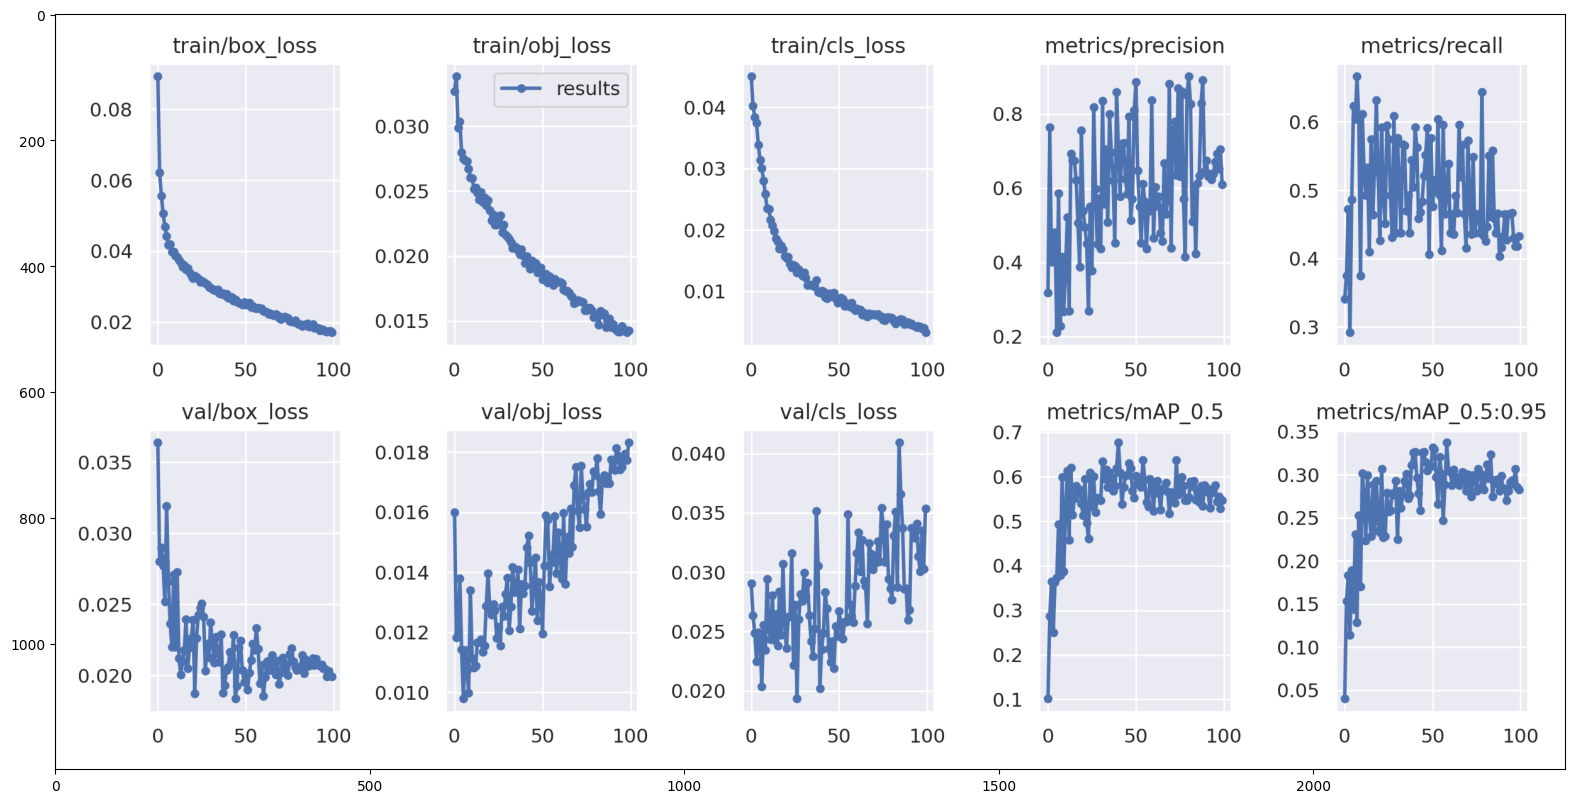

In [ ]:
#Training and validation result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5s_noise/results.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [ ]:
#noise (Yolov5s) - test
 
!python val.py --batch 16 --img 416 --data data/custom_data.yaml --weights "runs/train/tooth2/weights/best.pt"

val: data=data/custom_data.yaml, weights=['runs/train/tooth2/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/test.cache' images and labels... 48 found, 0 missing, 0 empty, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.24it/s]
                   all         48         91      0.597      0.534      0.525      0.289
No endodontic treatmenat         48         26      0.578      0.423 

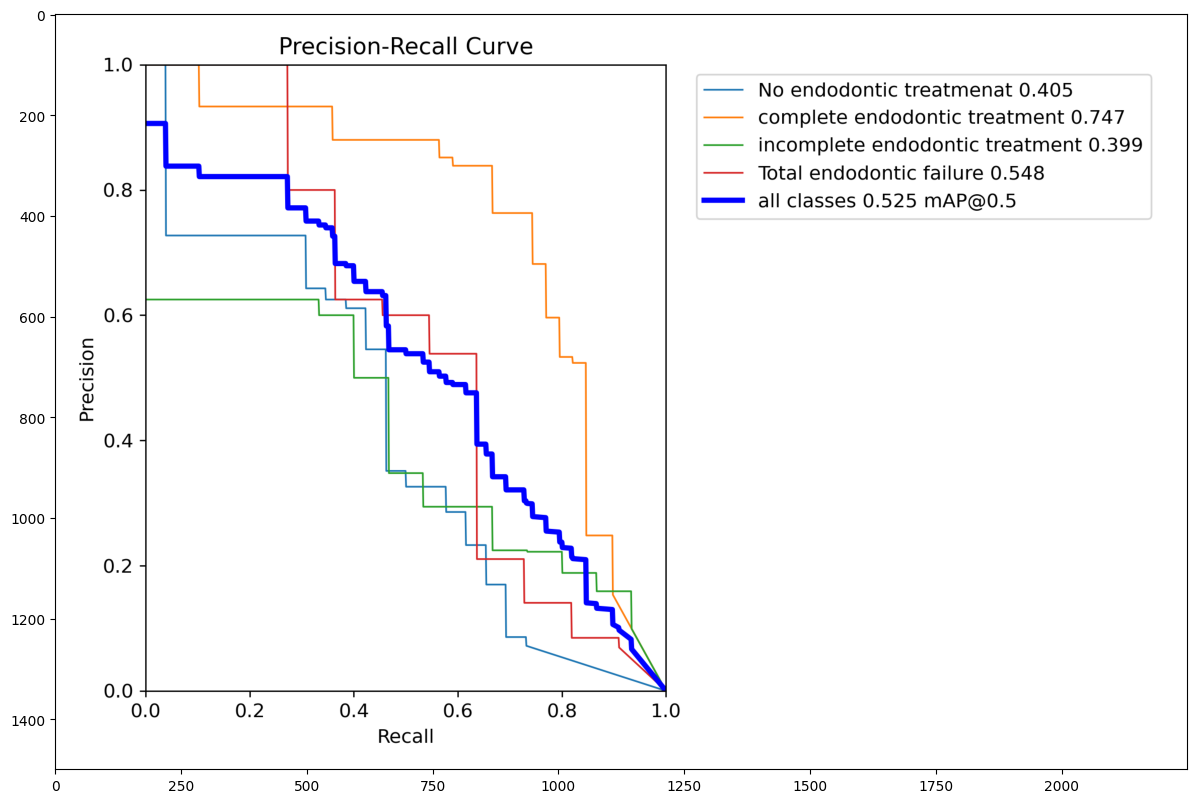

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5s_noise/PR_curve.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [ ]:
import cv2
from pathlib import Path
import sys
import os
import time

In [ ]:
#inference time yolov5s (Noise)




image = cv2.imread('../ptf (102).jpg')
model = torch.hub.load('.', 'custom', '/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5s_noise/weights/best.pt', source='local') 
result = model(image)
total = []
res = []
total.clear()
for i in range(1000):
    start = time.time()
    model(image)
    
    inference_time = time.time() - start
    total.append(inference_time)
    #print("Total Inference time: {:3.0f} ms\n".format(inference_time * 1000))

print("Average inference time using detect.py: {:3.0f} ms\n".format(sum(total) / len(total)*1000))


YOLOv5 🚀 v6.2-88-g15e82d2 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Average inference time using detect.py:  12 ms



###Yolov5x

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data data/custom_data.yaml --name tooth --weights yolov5x.pt --cache ram

train: weights=yolov5x.pt, cfg=, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=tooth, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

In [ ]:
#noise (Yolov5x) - test
 
!python val.py --batch 16 --img 416 --data data/custom_data.yaml --weights "runs/train/tooth/weights/best.pt"

val: data=data/custom_data.yaml, weights=['runs/train/tooth/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86193601 parameters, 0 gradients, 203.8 GFLOPs
val: Scanning '/content/dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/data/labels/test.cache' images and labels... 48 found, 0 missing, 0 empty, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.02it/s]
                   all         48         91      0.655      0.539      0.569      0.336
No endodontic treatmenat         48         26      0.592       0.39

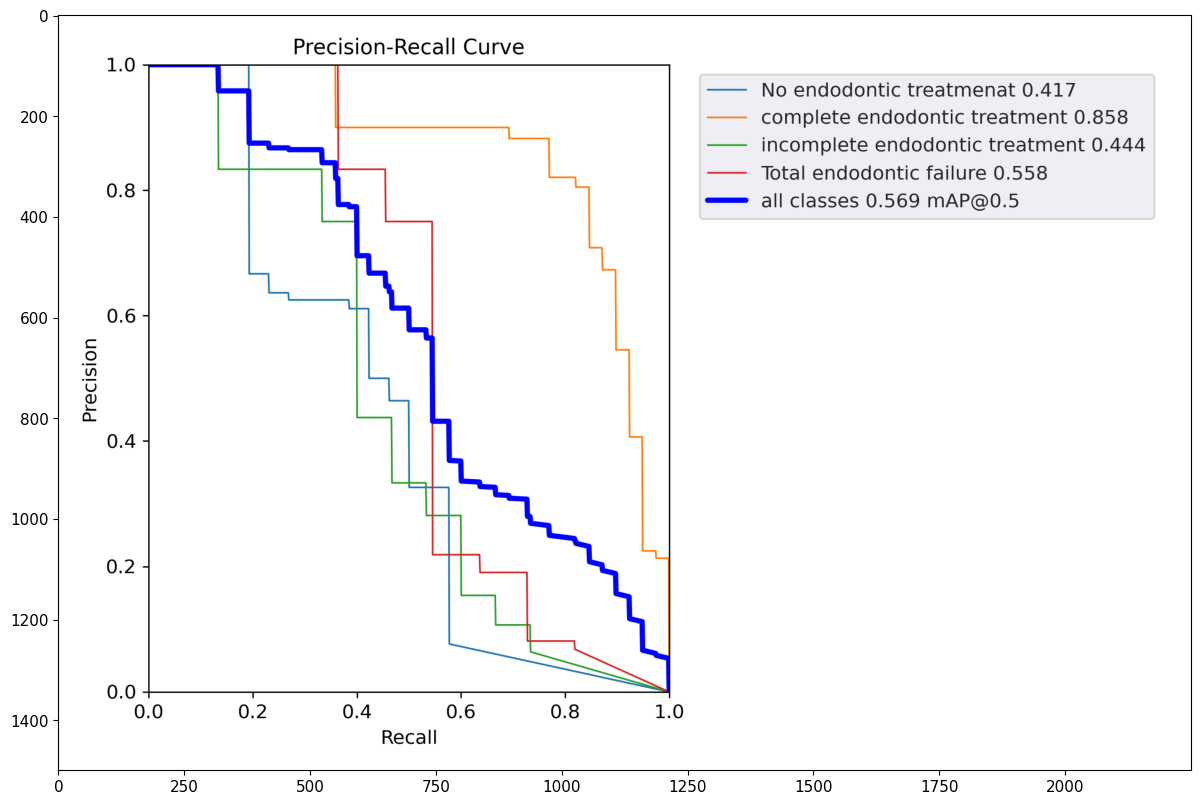

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_noise/PR_curve.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

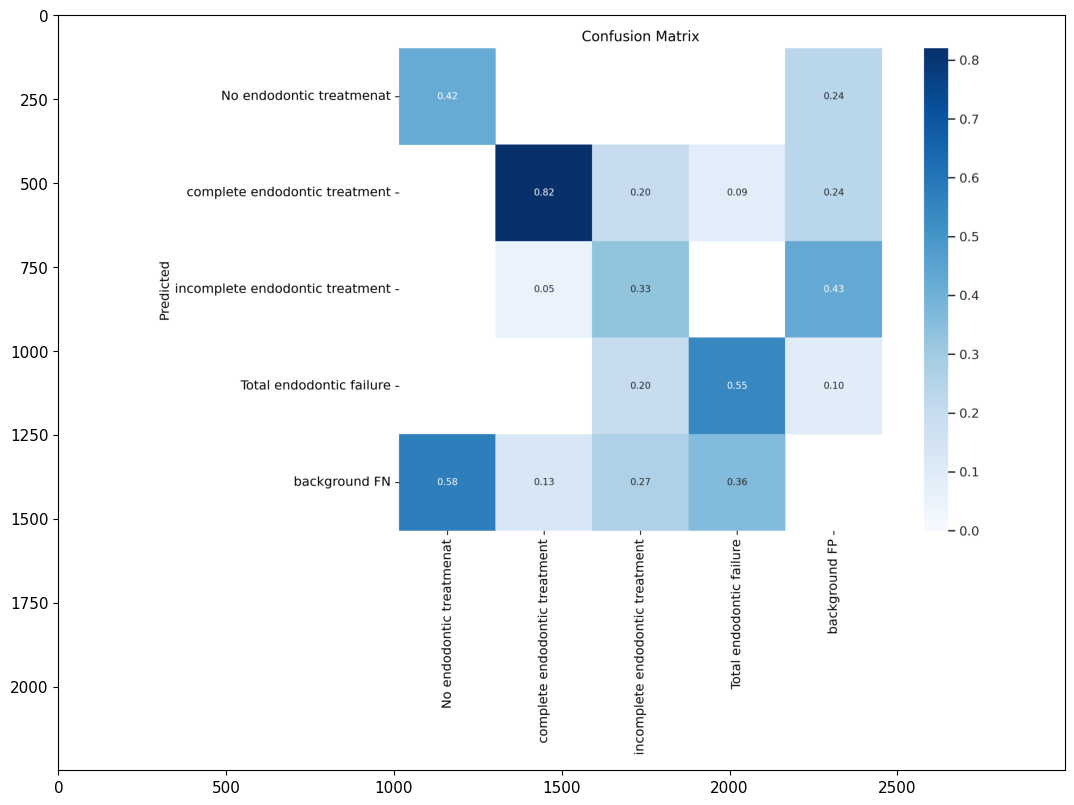

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_noise/confusion_matrix.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [ ]:
#yolov5x
import os
import numpy as np

n_classes = 4
cm = np.array([[0.42,0,0,0],
               [0,0.82,0.20,0.09],
               [0,0.05,0.33,0.0],
               [0.0,0.0,0.20,0.55]])

# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity=tp/(tp+fn)
    
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {}, specificity {}, sensitivity {} ,accurcay {}\
          precision {}, f1 {},  tp:{},  fp:{},  fn:{},  tn:{}".format(c,round(recall,2), round(specificity,2),round(sensitivity,2),round(accuracy,2), round(precision,2),round(f1_score,2),round(tp,2),round(fp,2),round(fn,2),round(tn,2)))
    
accur=accuracy+accuracy
accur=accur/4
print("total accuracy:",round(accuracy,3))
    


for class 0: recall 1.0, specificity 1.0, sensitivity 1.0 ,accurcay 1.0          precision 1.0, f1 1.0,  tp:0.42,  fp:0.0,  fn:0.0,  tn:2.24
for class 1: recall 0.74, specificity 0.97, sensitivity 0.74 ,accurcay 0.87          precision 0.94, f1 0.83,  tp:0.82,  fp:0.05,  fn:0.29,  tn:1.5
for class 2: recall 0.87, specificity 0.82, sensitivity 0.87 ,accurcay 0.83          precision 0.45, f1 0.59,  tp:0.33,  fp:0.4,  fn:0.05,  tn:1.88
for class 3: recall 0.73, specificity 0.95, sensitivity 0.73 ,accurcay 0.89          precision 0.86, f1 0.79,  tp:0.55,  fp:0.09,  fn:0.2,  tn:1.82
total accuracy: 0.891


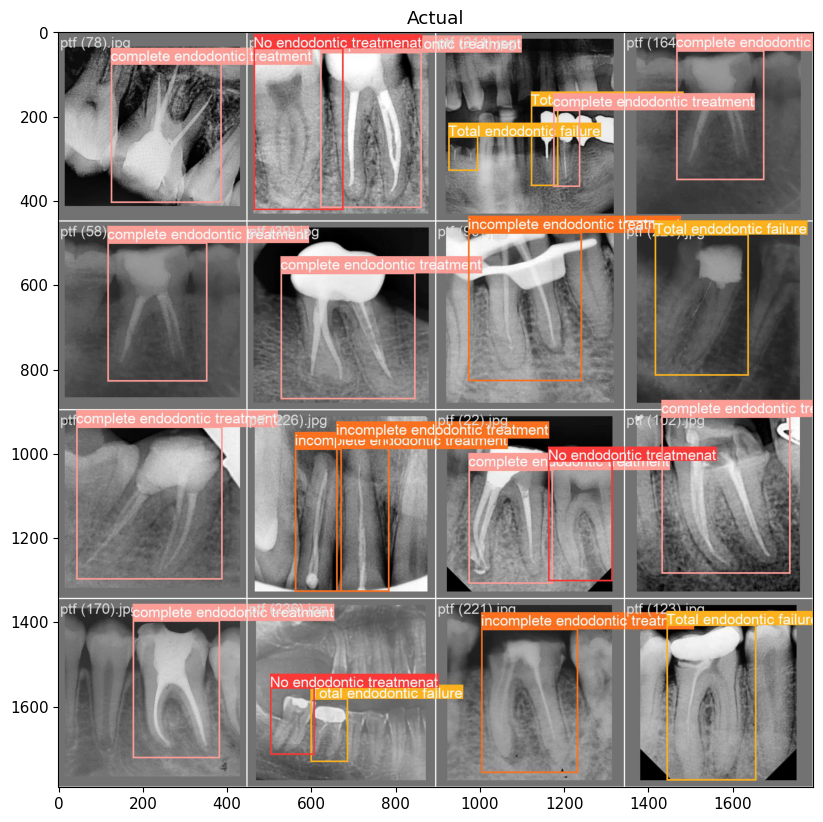

In [ ]:
image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_noise/val_batch1_labels.jpg")
plt.figure(figsize=(20,10))
plt.title("Actual")
plt.imshow(image)
plt.show()

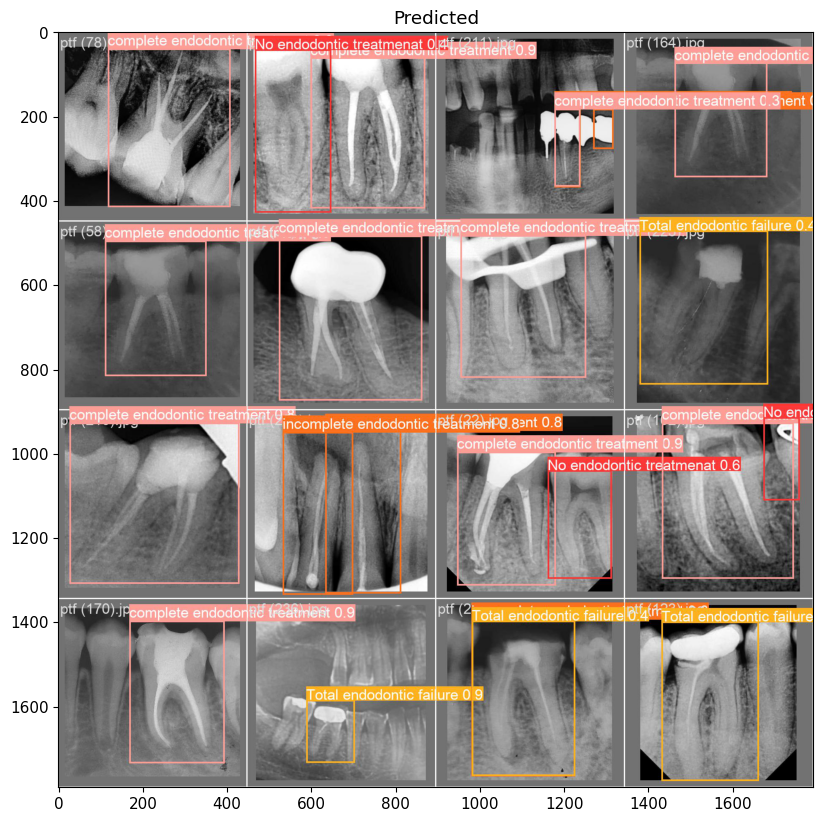

In [ ]:
image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_noise/val_batch1_pred.jpg")
plt.figure(figsize=(20,10))
plt.title("Predicted")
plt.imshow(image)
plt.show()

In [ ]:
#inference time yolov5x (Noise)
image = cv2.imread('../ptf (102).jpg')
model = torch.hub.load('.', 'custom', '/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5x_noise/weights/best.pt', source='local') 
result = model(image)
total = []
res = []
total.clear()
for i in range(1000):
    start = time.time()
    model(image)
    
    inference_time = time.time() - start
    total.append(inference_time)
    #print("Total Inference time: {:3.0f} ms\n".format(inference_time * 1000))

print("Average inference time using detect.py: {:3.0f} ms\n".format(sum(total) / len(total)*1000))


YOLOv5 🚀 v6.2-88-g15e82d2 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86193601 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


Average inference time using detect.py:  58 ms



##DENOISE

##BM3D - Denosing Algorithm

In [ ]:
!pip install bm3d
import bm3d
import os
import matplotlib.image
import imageio
from skimage import io
os.makedirs("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/BM3D")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 4.7 MB/s 


In [ ]:
# Read a PIL image

for i in range(240):
 image = Image.open(f'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat/Plat ptf a11/ptf ({i+1}).jpg')
 # Define a transform to convert PIL 
 # image to a Torch tensor
 transform = transforms.Compose([
    
    transforms.ToTensor()
    
 ])
  
 # transform = transforms.PILToTensor()
 # Convert the PIL image to Torch tensor
 img_tensor = transform(image)
 denoised_image = bm3d.bm3d(img_tensor.permute(1,2,0), sigma_psd=27/301, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
 # print the converted Torch tensor
 imageio.imwrite(f'dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/BM3D/ptf ({i+1}).jpg', denoised_image)


Noised Image


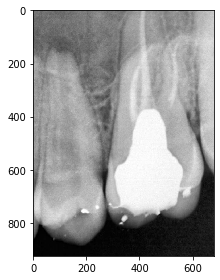

In [ ]:
#Noise Image
print("Noised Image")
img = io.imread("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/Plat/Plat ptf a11/ptf (109).jpg")
io.imshow(img)

Denoised Image


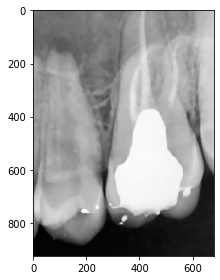

In [ ]:
#Denoised Image
img = io.imread("dataset/ROOTCANAL_MAIN_NOISE/ROOTCANAL_MAIN_NOISE/BM3D/ptf (109).jpg")
print("Denoised Image")
io.imshow(img)

###YOLOV5S

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data data/custom_data.yaml --name tooth --weights yolov5s.pt --cache ram

train: weights=yolov5s.pt, cfg=, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=tooth, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

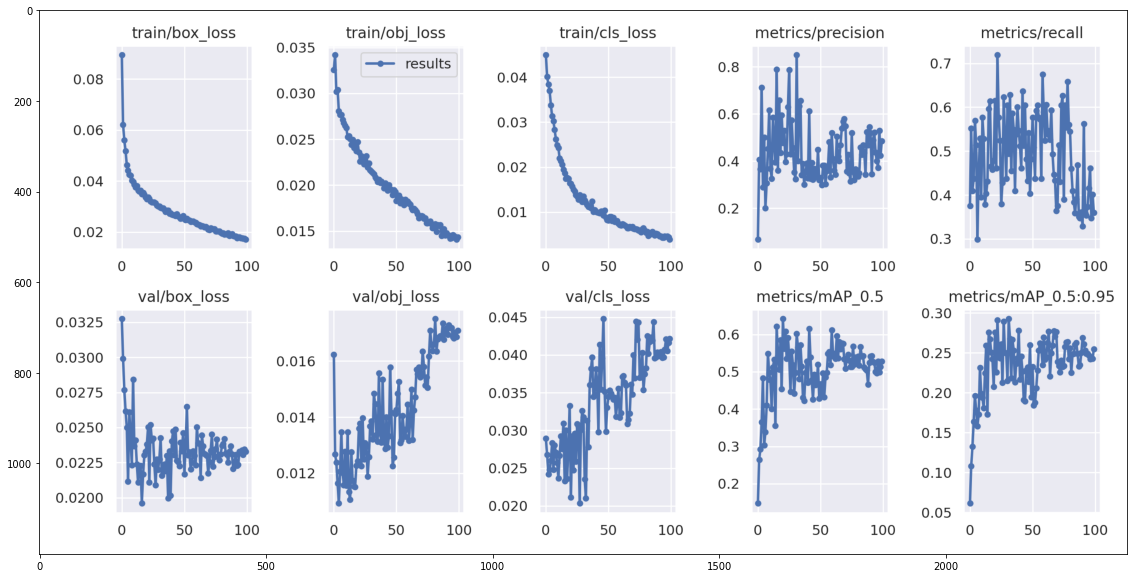

In [ ]:
#Training and validation result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5s_denoise/results.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [ ]:
#denoise (Yolov5s) - test
 
!python val.py --batch 16 --img 416 --data data/custom_data.yaml --weights "runs/train/tooth/weights/best.pt"

val: data=data/custom_data.yaml, weights=['runs/train/tooth/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/dataset/ROOTCANAL_MAIN_DENOISE/ROOTCANAL_MAIN_DENOISE/data/labels/test' images and labels...48 found, 0 missing, 0 empty, 0 corrupt: 100% 48/48 [00:00<00:00, 1266.44it/s]
val: New cache created: /content/dataset/ROOTCANAL_MAIN_DENOISE/ROOTCANAL_MAIN_DENOISE/data/labels/test.cache
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.15it/s]
                   all         48         

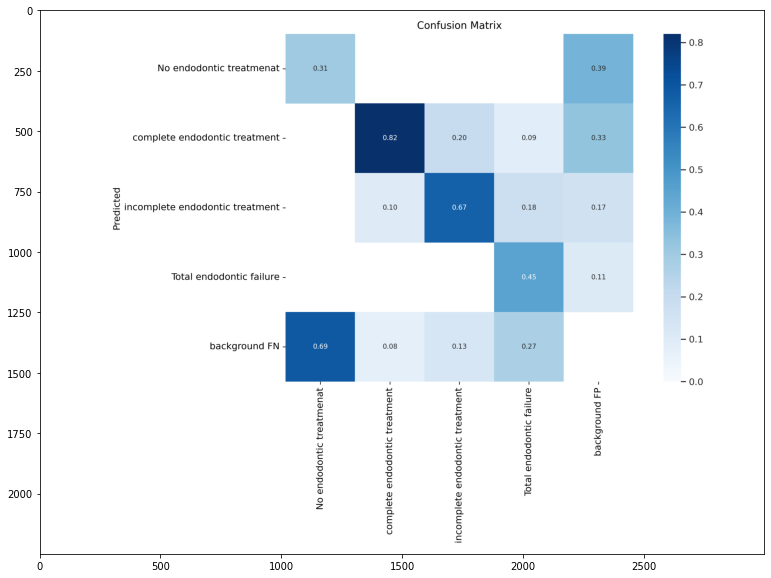

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5s_denoise/confusion_matrix.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

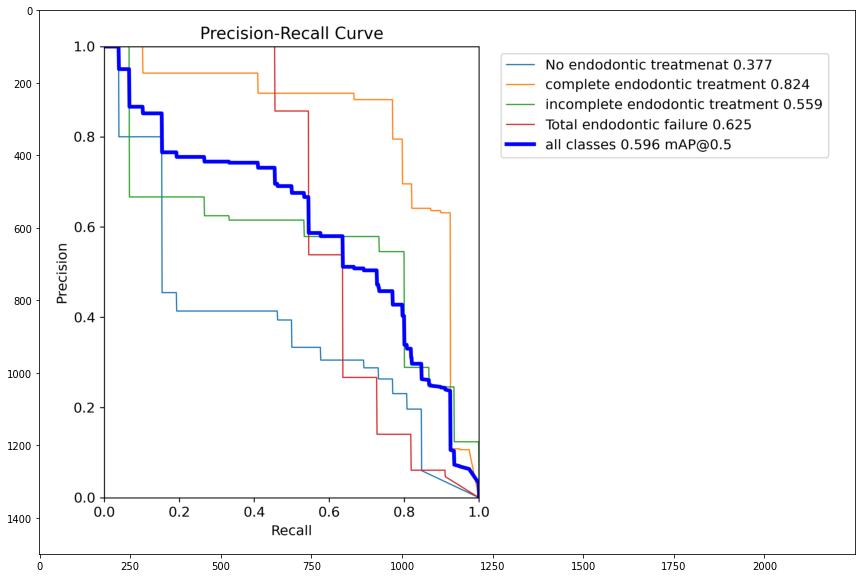

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5s_denoise/PR_curve.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

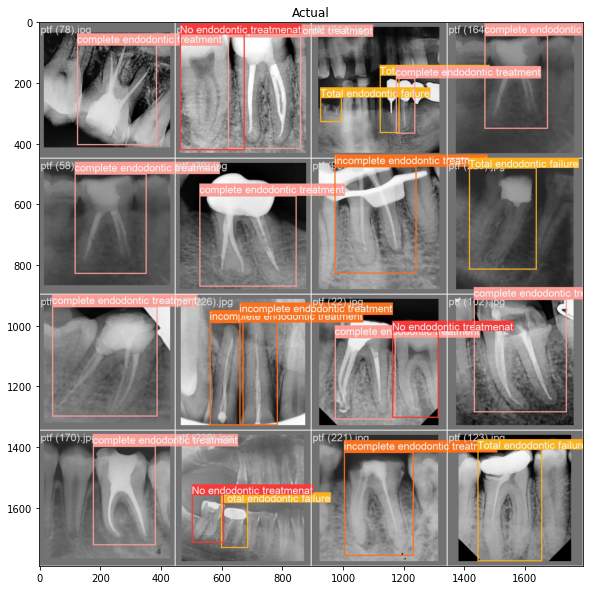

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5s_denoise/val_batch1_labels.jpg")
plt.figure(figsize=(20,10))
plt.title("Actual")
plt.imshow(image)
plt.show()

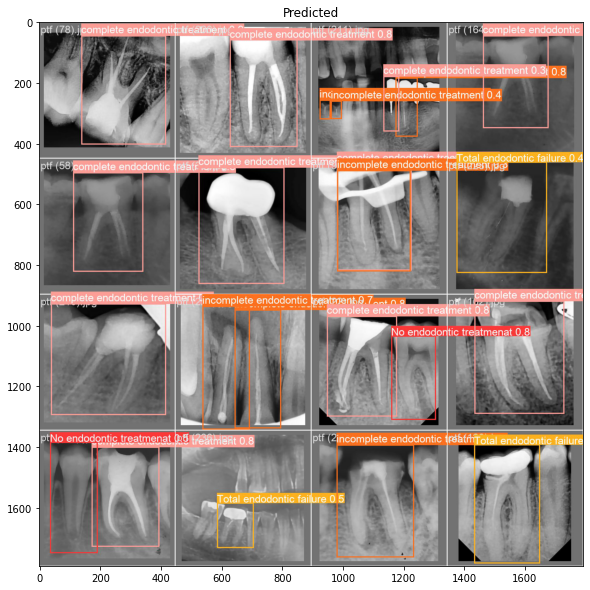

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5s_denoise/val_batch1_pred.jpg")
plt.figure(figsize=(20,10))
plt.title("Predicted")
plt.imshow(image)
plt.show()

In [ ]:
#inference time yolov5s (Denoise)

import cv2
from pathlib import Path
import sys
import os
import time
import torch

image = cv2.imread('../ptf (102).jpg')
model = torch.hub.load('.', 'custom', '/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5s_denoise/weights/best.pt', source='local') 
result = model(image)
total = []
res = []
total.clear()
for i in range(1000):
    start = time.time()
    model(image)
    
    inference_time = time.time() - start
    total.append(inference_time)
    #print("Total Inference time: {:3.0f} ms\n".format(inference_time * 1000))

print("Average inference time using detect.py: {:3.0f} ms\n".format(sum(total) / len(total)*1000))


YOLOv5 🚀 v6.2-88-g15e82d2 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Average inference time using detect.py:  12 ms



###YOLOV5x

In [ ]:
!python train.py --img 416 --batch 16 --epochs 100 --data data/custom_data.yaml --name tooth --weights yolov5x.pt --cache ram

train: weights=yolov5x.pt, cfg=, data=data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=tooth, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, 

In [ ]:
#denoise (Yolov5x) - test
 
!python val.py --batch 16 --img 416 --data data/custom_data.yaml --weights "runs/train/tooth/weights/best.pt"

val: data=data/custom_data.yaml, weights=['runs/train/tooth/weights/best.pt'], batch_size=16, imgsz=416, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86193601 parameters, 0 gradients, 203.8 GFLOPs
val: Scanning '/content/dataset/ROOTCANAL_MAIN_DENOISE/ROOTCANAL_MAIN_DENOISE/data/labels/test.cache' images and labels... 48 found, 0 missing, 0 empty, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:03<00:00,  1.03s/it]
                   all         48         91      0.599      0.528      0.557      0.335
No endodontic treatmenat         48         26      0.565      0

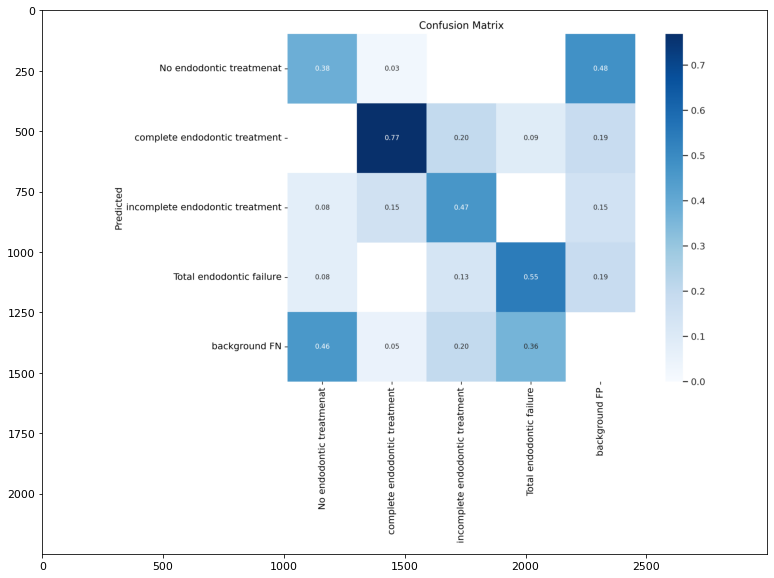

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_denoise/confusion_matrix.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

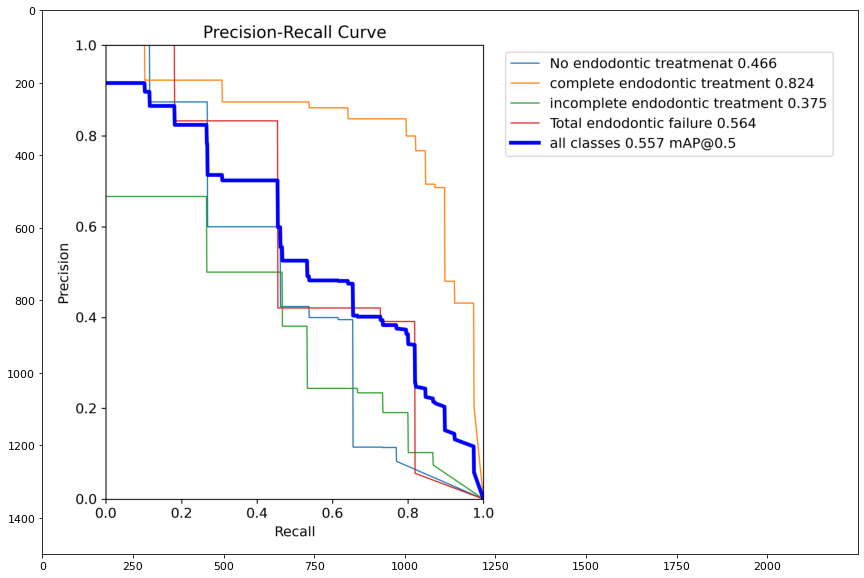

In [ ]:
#Test result

image = mpimg.imread("/content/drive/MyDrive/Final_result_endodontic_project/results (Test set)/before balance/yolov5x_denoise/PR_curve.png")
plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [ ]:
#inference time yolov5x (Denoise)

import cv2
from pathlib import Path
import sys
import os
import time
import torch

image = cv2.imread('../ptf (102).jpg')
model = torch.hub.load('.', 'custom', '/content/drive/MyDrive/Final_result_endodontic_project/results_(Train & Valid)/before balance/retrain_yolov5x_denoise/weights/best.pt', source='local') 
result = model(image)
total = []
res = []
total.clear()
for i in range(1000):
    start = time.time()
    model(image)
    
    inference_time = time.time() - start
    total.append(inference_time)
    #print("Total Inference time: {:3.0f} ms\n".format(inference_time * 1000))

print("Average inference time using detect.py: {:3.0f} ms\n".format(sum(total) / len(total)*1000))


YOLOv5 🚀 v6.2-88-g15e82d2 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 444 layers, 86193601 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


Average inference time using detect.py:  59 ms



#Class Accuracy From Confusion matrix
TP,TN,FP,FN,SP,SN,Accuracy

##Noised

In [4]:
#yolov5s
import os
import numpy as np

n_classes = 4
cm = np.array([[0.42,0,0,0],
               [0,0.77,0.53,0.0],
               [0,0.05,0.20,0.18],
               [0.0,0.03,0.20,0.64]])

# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity=tp/(tp+fn)
    
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {}, specificity {}, sensitivity {} ,accurcay {}\
          precision {}, f1 {},  tp:{},  fp:{},  fn:{},  tn:{}".format(c,round(recall,2), round(specificity,2),round(sensitivity,2),round(accuracy,2), round(precision,2),round(f1_score,2),round(tp,2),round(fp,2),round(fn,2),round(tn,2)))
    
accur=accuracy+accuracy
accur=accur/4
print("total accuracy:",round(accuracy,3))
    


for class 0: recall 1.0, specificity 1.0, sensitivity 1.0 ,accurcay 1.0          precision 1.0, f1 1.0,  tp:0.42,  fp:0.0,  fn:0.0,  tn:2.6
for class 1: recall 0.59, specificity 0.95, sensitivity 0.59 ,accurcay 0.8          precision 0.91, f1 0.72,  tp:0.77,  fp:0.08,  fn:0.53,  tn:1.64
for class 2: recall 0.47, specificity 0.72, sensitivity 0.47 ,accurcay 0.68          precision 0.22, f1 0.29,  tp:0.2,  fp:0.73,  fn:0.23,  tn:1.86
for class 3: recall 0.74, specificity 0.92, sensitivity 0.74 ,accurcay 0.86          precision 0.78, f1 0.76,  tp:0.64,  fp:0.18,  fn:0.23,  tn:1.97
total accuracy: 0.864


In [5]:
#yolov5x
import os
import numpy as np

n_classes = 4
cm = np.array([[0.42,0,0,0],
               [0,0.82,0.20,0.09],
               [0,0.05,0.33,0.0],
               [0.0,0.0,0.20,0.55]])

# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity=tp/(tp+fn)
    
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {}, specificity {}, sensitivity {} ,accurcay {}\
          precision {}, f1 {},  tp:{},  fp:{},  fn:{},  tn:{}".format(c,round(recall,2), round(specificity,2),round(sensitivity,2),round(accuracy,2), round(precision,2),round(f1_score,2),round(tp,2),round(fp,2),round(fn,2),round(tn,2)))
    
accur=accuracy+accuracy
accur=accur/4
print("total accuracy:",round(accuracy,3))
    


for class 0: recall 1.0, specificity 1.0, sensitivity 1.0 ,accurcay 1.0          precision 1.0, f1 1.0,  tp:0.42,  fp:0.0,  fn:0.0,  tn:2.24
for class 1: recall 0.74, specificity 0.97, sensitivity 0.74 ,accurcay 0.87          precision 0.94, f1 0.83,  tp:0.82,  fp:0.05,  fn:0.29,  tn:1.5
for class 2: recall 0.87, specificity 0.82, sensitivity 0.87 ,accurcay 0.83          precision 0.45, f1 0.59,  tp:0.33,  fp:0.4,  fn:0.05,  tn:1.88
for class 3: recall 0.73, specificity 0.95, sensitivity 0.73 ,accurcay 0.89          precision 0.86, f1 0.79,  tp:0.55,  fp:0.09,  fn:0.2,  tn:1.82
total accuracy: 0.891


##Denoised

In [6]:
#yolov5s
import os
import numpy as np

n_classes = 4
cm = np.array([[0.31,0,0,0],
               [0,0.82,0.20,0.09],
               [0,0.10,0.67,0.18],
               [0.0,0,0,0.45]])

# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity=tp/(tp+fn)
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {}, specificity {}, sensitivity {} ,accurcay {}\
          precision {}, f1 {},  tp:{},  fp:{},  fn:{},  tn:{}".format(c,round(recall,2), round(specificity,2),round(sensitivity,2),round(accuracy,2), round(precision,2),round(f1_score,2),round(tp,2),round(fp,2),round(fn,2),round(tn,2)))
    
accur=accuracy+accuracy
accur=accur/4
print("total accuracy:",round(accuracy,3))
    


for class 0: recall 1.0, specificity 1.0, sensitivity 1.0 ,accurcay 1.0          precision 1.0, f1 1.0,  tp:0.31,  fp:0.0,  fn:0.0,  tn:2.51
for class 1: recall 0.74, specificity 0.94, sensitivity 0.74 ,accurcay 0.86          precision 0.89, f1 0.81,  tp:0.82,  fp:0.1,  fn:0.29,  tn:1.61
for class 2: recall 0.71, specificity 0.89, sensitivity 0.71 ,accurcay 0.83          precision 0.77, f1 0.74,  tp:0.67,  fp:0.2,  fn:0.28,  tn:1.67
for class 3: recall 1.0, specificity 0.89, sensitivity 1.0 ,accurcay 0.9          precision 0.62, f1 0.77,  tp:0.45,  fp:0.27,  fn:0.0,  tn:2.1
total accuracy: 0.904


In [7]:
#yolov5x
import os
import numpy as np

n_classes = 4
cm = np.array([[0.38,0.03,0,0],
               [0,0.77,0.20,0.09],
               [0.08,0.15,0.47,0.0],
               [0.8,0,0.13,0.55]])

# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    sensitivity=tp/(tp+fn)
    
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {}, specificity {}, sensitivity {} ,accurcay {}\
          precision {}, f1 {},  tp:{},  fp:{},  fn:{},  tn:{}".format(c,round(recall,2), round(specificity,2),round(sensitivity,2),round(accuracy,2), round(precision,2),round(f1_score,2),round(tp,2),round(fp,2),round(fn,2),round(tn,2)))
    
accur=accuracy+accuracy
accur=accur/4
print("total accuracy:",round(accuracy,3))
    


for class 0: recall 0.93, specificity 0.73, sensitivity 0.93 ,accurcay 0.75          precision 0.3, f1 0.46,  tp:0.38,  fp:0.88,  fn:0.03,  tn:2.36
for class 1: recall 0.73, specificity 0.93, sensitivity 0.73 ,accurcay 0.87          precision 0.81, f1 0.77,  tp:0.77,  fp:0.18,  fn:0.29,  tn:2.41
for class 2: recall 0.67, specificity 0.89, sensitivity 0.67 ,accurcay 0.85          precision 0.59, f1 0.63,  tp:0.47,  fp:0.33,  fn:0.23,  tn:2.62
for class 3: recall 0.37, specificity 0.96, sensitivity 0.37 ,accurcay 0.72          precision 0.86, f1 0.52,  tp:0.55,  fp:0.09,  fn:0.93,  tn:2.08
total accuracy: 0.721
